In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import STOPWORDS, WordCloud

In [154]:
df = pd.read_excel('D:/Excel Sheets/prepared_canada_data.xlsx')

In [155]:
df_continent = df.groupby('Continent', axis=0).sum()
years = df.columns[4:-1]

# Line Plot


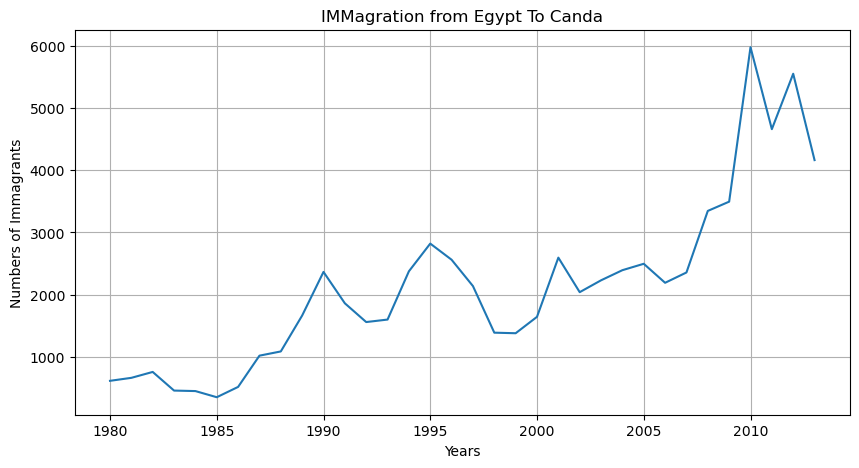

In [99]:
df.set_index('Country', inplace=True)
plt.figure(figsize=(10, 5))
df.loc['Egypt', years].plot(kind='line')
plt.title('IMMagration from Egypt To Canda')
plt.xlabel('Years')
plt.ylabel('Numbers of Immagrants')
plt.grid()
plt.show()

# Area Plot

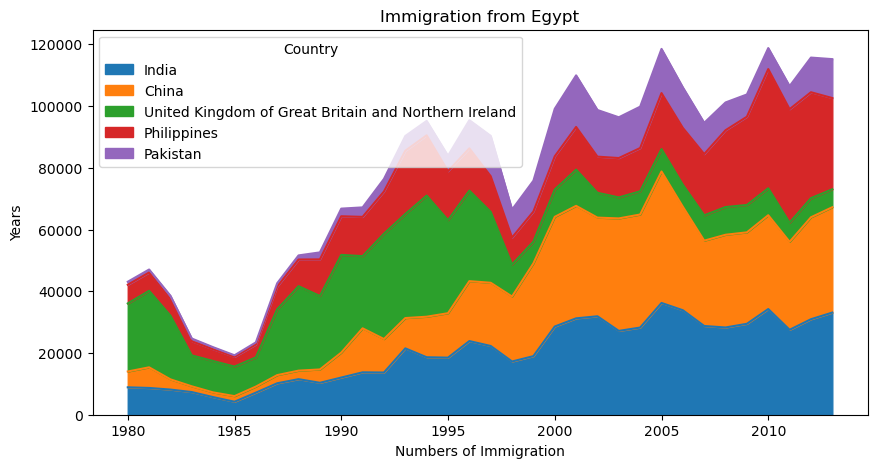

In [100]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df.head()[years].transpose()
df_top5.plot(figsize=(10, 5), kind='area')
plt.title("Immigration from Egypt")
plt.xlabel('Numbers of Immigration')
plt.ylabel('Years')
plt.show()

# Histogram

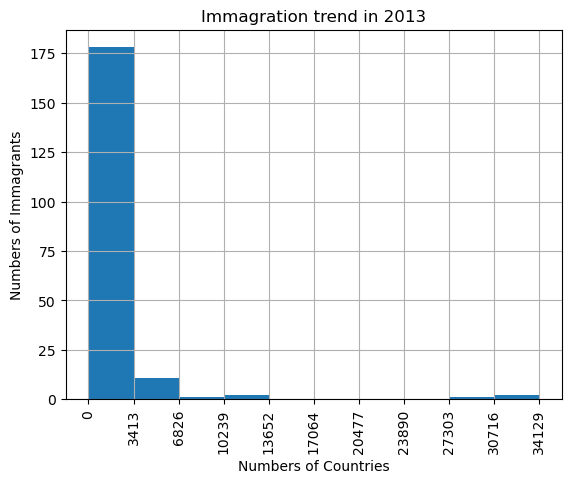

<Figure size 1000x500 with 0 Axes>

In [109]:
count, bin_edges = np.histogram(df[2013])
df[2013].plot(kind='hist', xticks=bin_edges)
plt.title('Immagration trend in 2013')
plt.xlabel('Numbers of Countries')
plt.ylabel('Numbers of Immagrants')
plt.grid()
plt.xticks(rotation=90)
plt.figure(figsize=(10, 5))
plt.show()

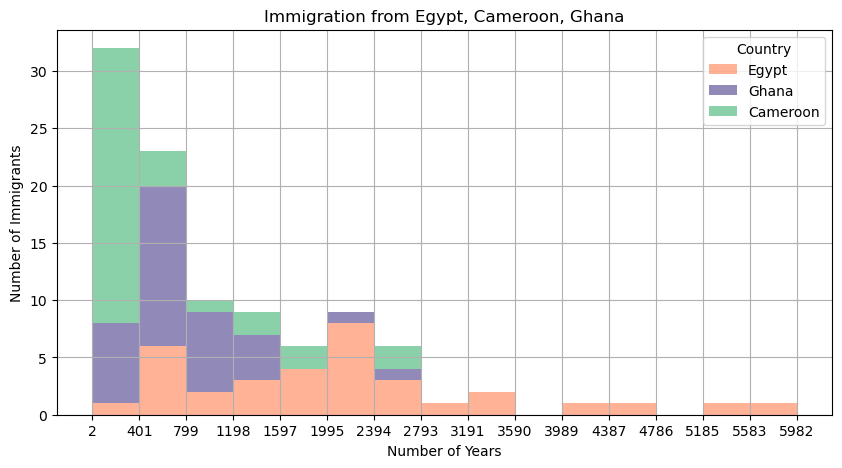

In [141]:
# Set 'Country' column as index
df.set_index('Country', inplace=True)

# Select data for Egypt, Ghana, and Cameroon, and transpose
df_histogram = df.loc[['Egypt', 'Ghana', 'Cameroon'], years].transpose()

# Calculate histogram
count, bin_edges = np.histogram(df_histogram, 15)

# Plot histogram
df_histogram.plot(kind='hist', figsize=(10, 5), bins=15, alpha=0.6,
                   xticks=bin_edges,
                   color=['coral', 'darkslateblue', 'mediumseagreen'],
                   stacked=True)

plt.title('Immigration from Egypt, Cameroon, Ghana')
plt.xlabel('Number of Years')
plt.ylabel('Number of Immigrants')
plt.grid()
plt.show()

# Bar Chart

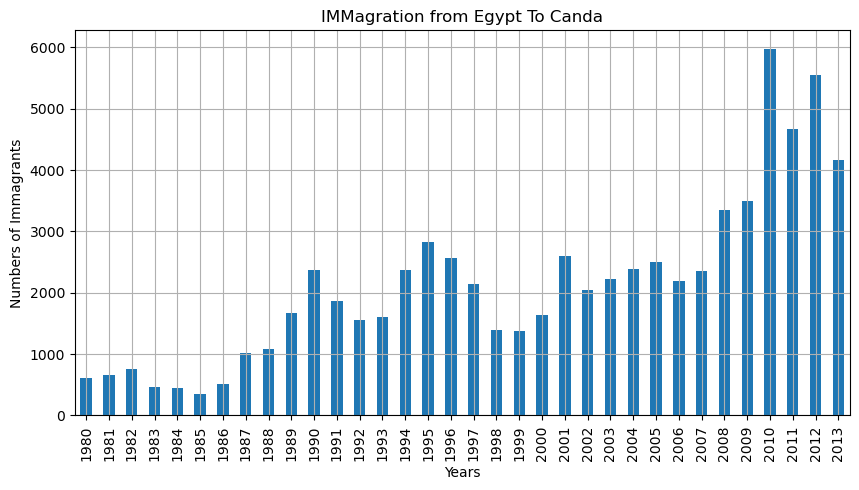

In [146]:
df.set_index('Country', inplace=True)
plt.figure(figsize=(10, 5))
df.loc['Egypt', years].plot(kind='bar')
plt.title('IMMagration from Egypt To Canda')
plt.xlabel('Years')
plt.ylabel('Numbers of Immagrants')
plt.grid()
plt.show()

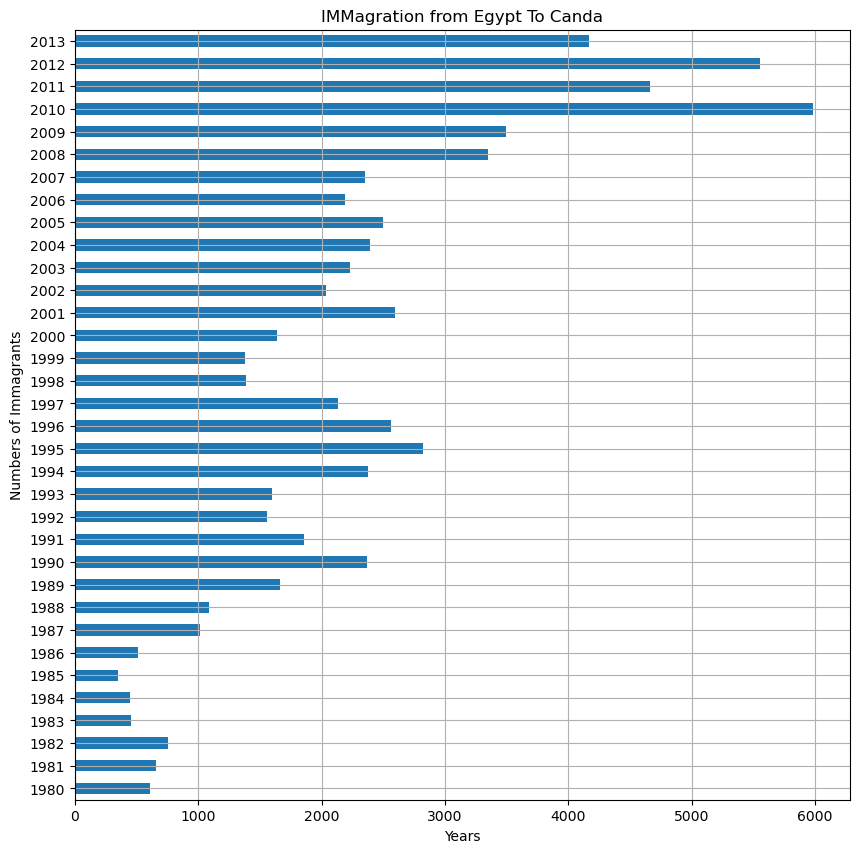

In [156]:
df.set_index('Country', inplace=True)
plt.figure(figsize=(10, 10))
df.loc['Egypt', years].plot(kind='barh')
plt.title('IMMagration from Egypt To Canda')
plt.xlabel('Years')
plt.ylabel('Numbers of Immagrants')
plt.grid()
plt.show()

# Pie chart

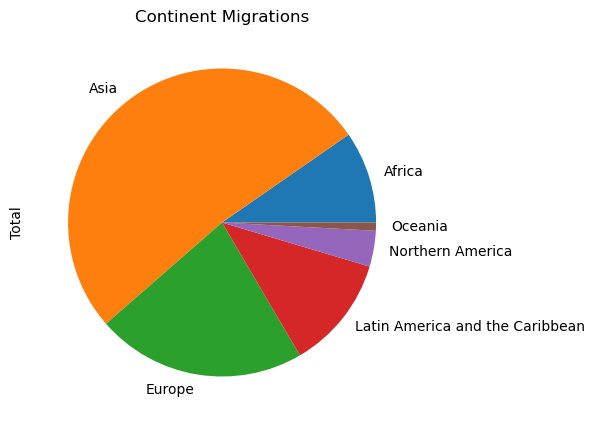

In [11]:
plt.figure(figsize = (10, 5))
df_continent['Total'].plot(kind='pie')
plt.title('Continent Migrations')
plt.show()

# Box Plot

<Figure size 1000x500 with 0 Axes>

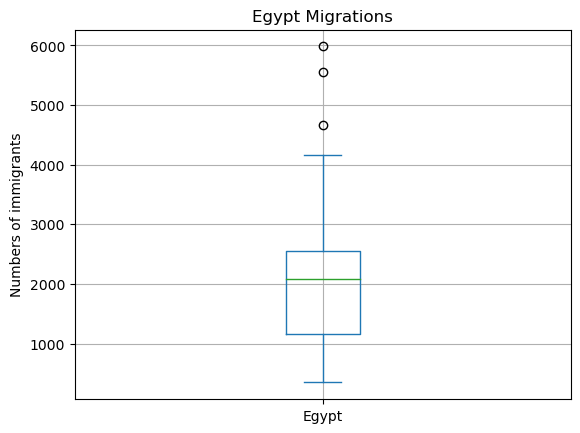

In [15]:
df.set_index('Country', inplace=True)
df_china = df.loc[['Egypt'], years].transpose()
plt.figure(figsize=(10, 5))
df_china.plot(kind='box')
plt.grid()
plt.title('Egypt Migrations')
plt.ylabel('Numbers of immigrants')
plt.show()

# Word Clouds

In [13]:
df_words = pd.read_excel(r"D:\Excel Sheets\Big data.xlsx") 

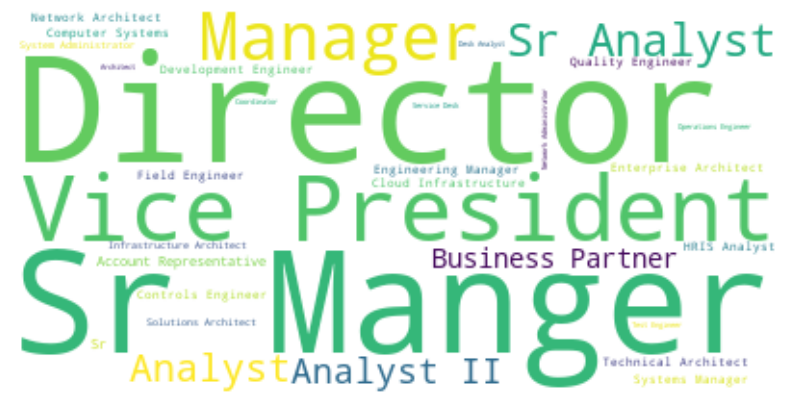

In [14]:
words = ' '.join(df_words['Job Title'])
stopwords = set(STOPWORDS)
stopwords.add('')
doc_wc = WordCloud(
    background_color='white',
    max_words=500,
    stopwords=stopwords
)
doc_wc.generate(words)
fig = plt.figure(figsize=(10, 5))
plt.imshow(doc_wc, interpolation='bilinear')  # Corrected 'interpolations' to 'interpolation'
plt.axis('off')
plt.show()


# Scatter plot

In [57]:
df_scatter = pd.DataFrame(df[years].sum(axis=0))

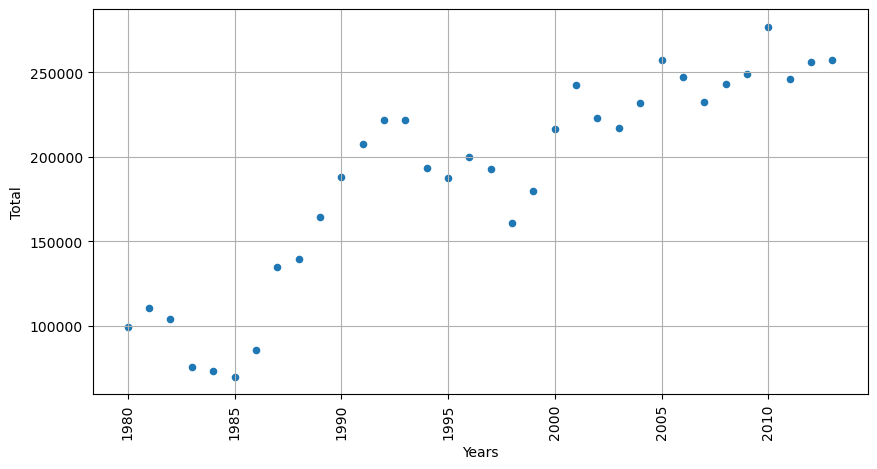

In [58]:
df_scatter.reset_index(inplace=True)
df_scatter.columns = ['Years', 'Total']
df_scatter.plot(kind='scatter', x='Years', y='Total', figsize=(10, 5))
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Bubble Scatter

In [78]:
df_bubble = df[years].transpose()
df_bubble.index = map(int, df_bubble.index)
df_bubble.index.name = 'year'
df_bubble.reset_index(inplace=True)

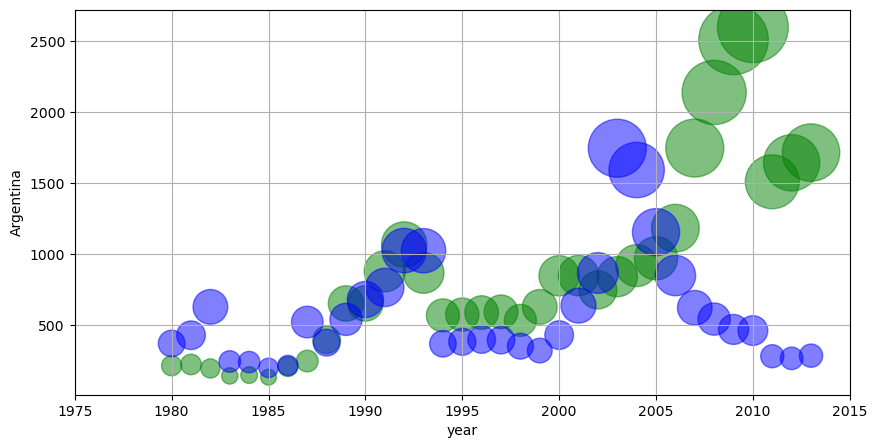

In [80]:
ax0 = df_bubble.plot(
    kind='scatter',
    x='year',
    y='Brazil',
    figsize=(10, 5),
    alpha=0.5,
    color='green',
    s=df_bubble['Brazil'],
    xlim=(1975, 2015)
)

# Create the second scatter plot on the same figure
ax1 = df_bubble.plot(
    kind='scatter',
    x='year',
    y='Argentina',
    figsize=(10, 5),
    alpha=0.5,
    color='blue',  
    s=df_bubble['Argentina'],
    ax=ax0  
)
plt.grid()
plt.show()

# Regression PLot

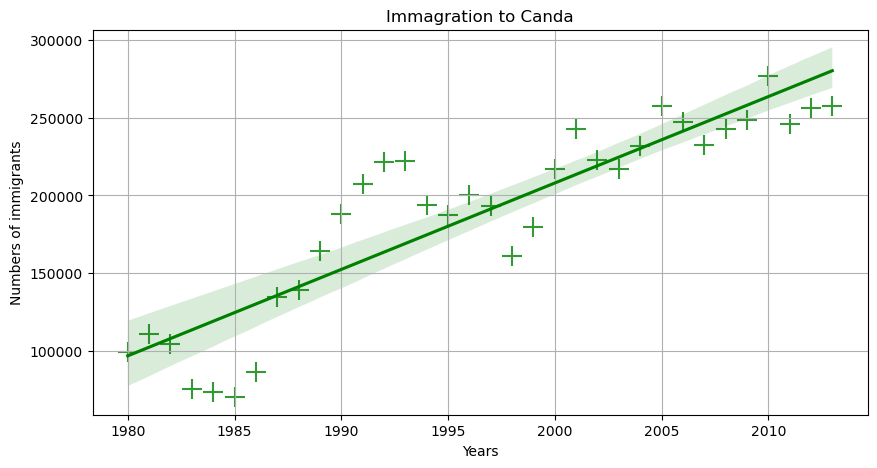

In [87]:
plt.figure(figsize=(10, 5))
ax = sns.regplot(x='Years', y='Total', data= df_scatter, color='green', marker='+', scatter_kws= {'s': 200})
ax.set(xlabel='Years', ylabel="Numbers of immigrants")
ax.grid()
ax.set_title('Immagration to Canda')
plt.show()